In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Load the dataset
url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Vaccine.csv"
df = pd.read_csv(url)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [83]:
df.shape

(26707, 34)

In [84]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [86]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [87]:
cat_columns=[col for col in df.columns if df[col].dtype=="object"]
cat_columns

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [88]:
num_columns=[col for col in df.columns if df[col].dtype!="object"]
num_columns

['unique_id',
 'h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [89]:
df['h1n1_worry'].value_counts()

h1n1_worry
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

In [90]:
df['h1n1_awareness'].value_counts()

h1n1_awareness
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

In [91]:
df['h1n1_awareness'].value_counts()

h1n1_awareness
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

In [92]:
df['contact_avoidance'].value_counts()

contact_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

In [93]:
df['bought_face_mask'].value_counts()

bought_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64

In [94]:
for column in num_columns:
    df[column]=df[column].fillna(df[column].mode()[0])

In [95]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [96]:
cat_columns

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [97]:
for column in cat_columns:
    print(df[column].isnull().sum())

0
1407
0
0
4423
1408
2042
1463
0


In [98]:
df1=df.copy()

In [99]:
df1.age_bracket.value_counts()

age_bracket
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [100]:
df1.age_bracket=df1.age_bracket.map({"18 - 34 Years":0,"35 - 44 Years":1,"45 - 54 Years":2,"55 - 64 Years":3,"65+ Years":4})

In [101]:
df1.race.value_counts()

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [102]:
df1.race=df1.race.map({"Other or Multiple":0,"Hispanic":1,"Black":2,"White":3})

In [103]:
df1.sex.value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [104]:
df1.sex=df1.sex.map({"Male":1,"Female":0})

In [105]:
df1.qualification.value_counts()

qualification
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [106]:
df1.qualification=df1.qualification.fillna(df1.qualification.mode()[0])

In [107]:
df1.qualification=df1.qualification.map({"< 12 Years":0,"12 Years":1,"Some College":2,"College Graduate":3})

In [108]:
df1.income_level.value_counts()

income_level
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [109]:
df1.income_level=df1.income_level.fillna(df1.income_level.mode()[0])

In [110]:
df1.income_level=df1.income_level.map({"Below Poverty":0,"> $75,000":1,"<= $75,000, Above Poverty":2})

In [111]:
df1.marital_status.value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [112]:
df1.marital_status=df1.marital_status.fillna(df1.marital_status.mode()[0])

In [113]:
df1.marital_status=df1.marital_status.map({"Not Married":0,"Married":1})

In [114]:
df1.housing_status.value_counts()

housing_status
Own     18736
Rent     5929
Name: count, dtype: int64

In [115]:
df1.housing_status=df1.housing_status.fillna(df1.housing_status.mode()[0])

In [116]:
df1.housing_status=df1.housing_status.map({"Rent":0,"Own":1})

In [117]:
df1.employment.value_counts()

employment
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [118]:
df1.employment=df1.employment.fillna(df1.employment.mode()[0])

In [119]:
df1.employment=df1.employment.map({"Unemployed":0,"Not in Labor Force":1,"Employed":2})

In [120]:
df1.census_msa.value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [121]:
df1.census_msa=df1.census_msa.map({"Non-MSA":0,"MSA, Principle City":1,"MSA, Not Principle  City":2})

In [122]:
df1.head(2)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,0,0,1,1,0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,0,0,0,2,2,0.0,0.0,0


In [123]:
df1.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

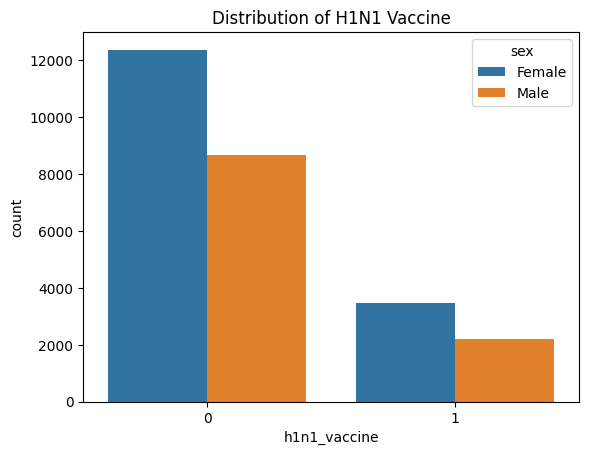

In [124]:
# Assuming df is your DataFrame
sns.countplot(x='h1n1_vaccine', data=df,hue='sex')
plt.title('Distribution of H1N1 Vaccine')
plt.show()

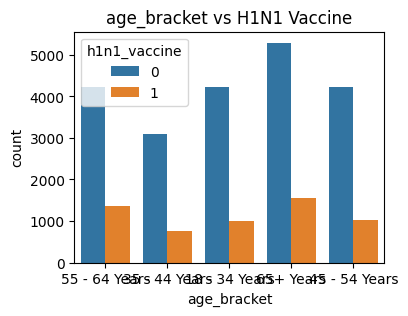

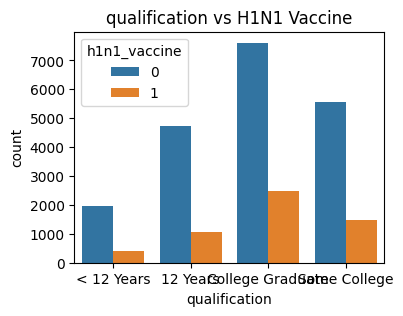

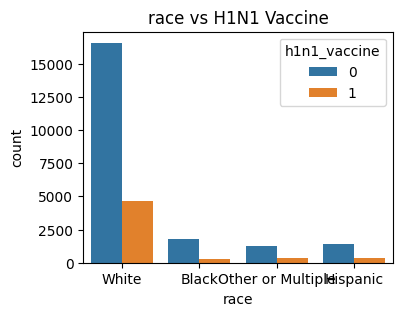

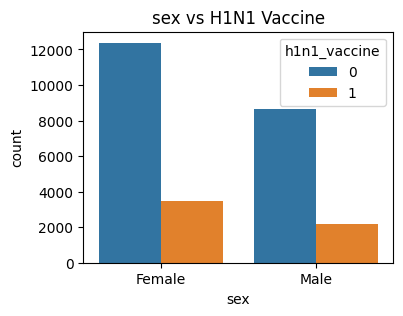

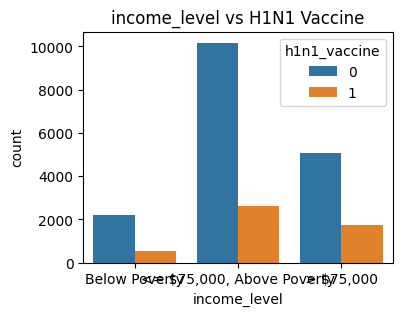

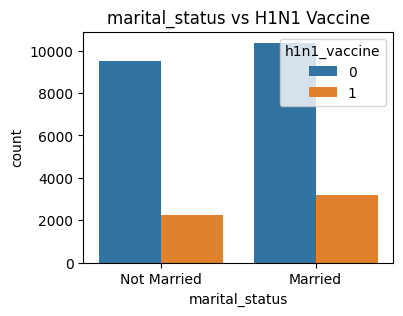

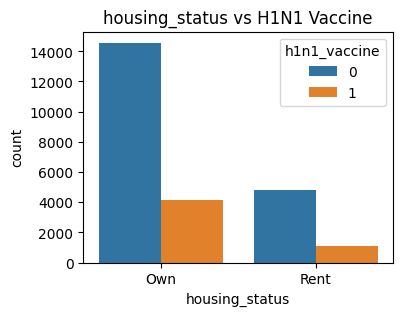

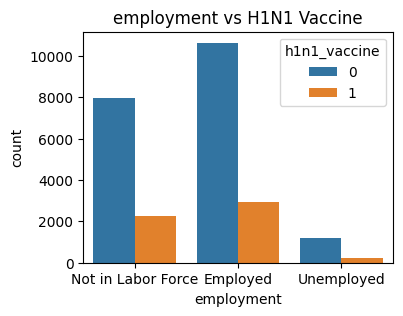

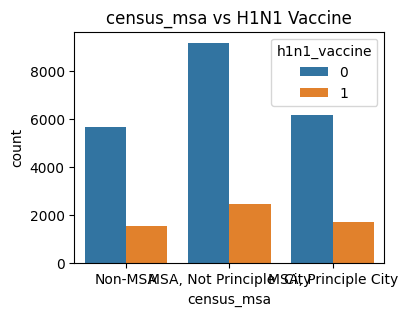

In [125]:
for feature in cat_columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=feature, hue='h1n1_vaccine', data=df)
    plt.title(f'{feature} vs H1N1 Vaccine')
    plt.show()

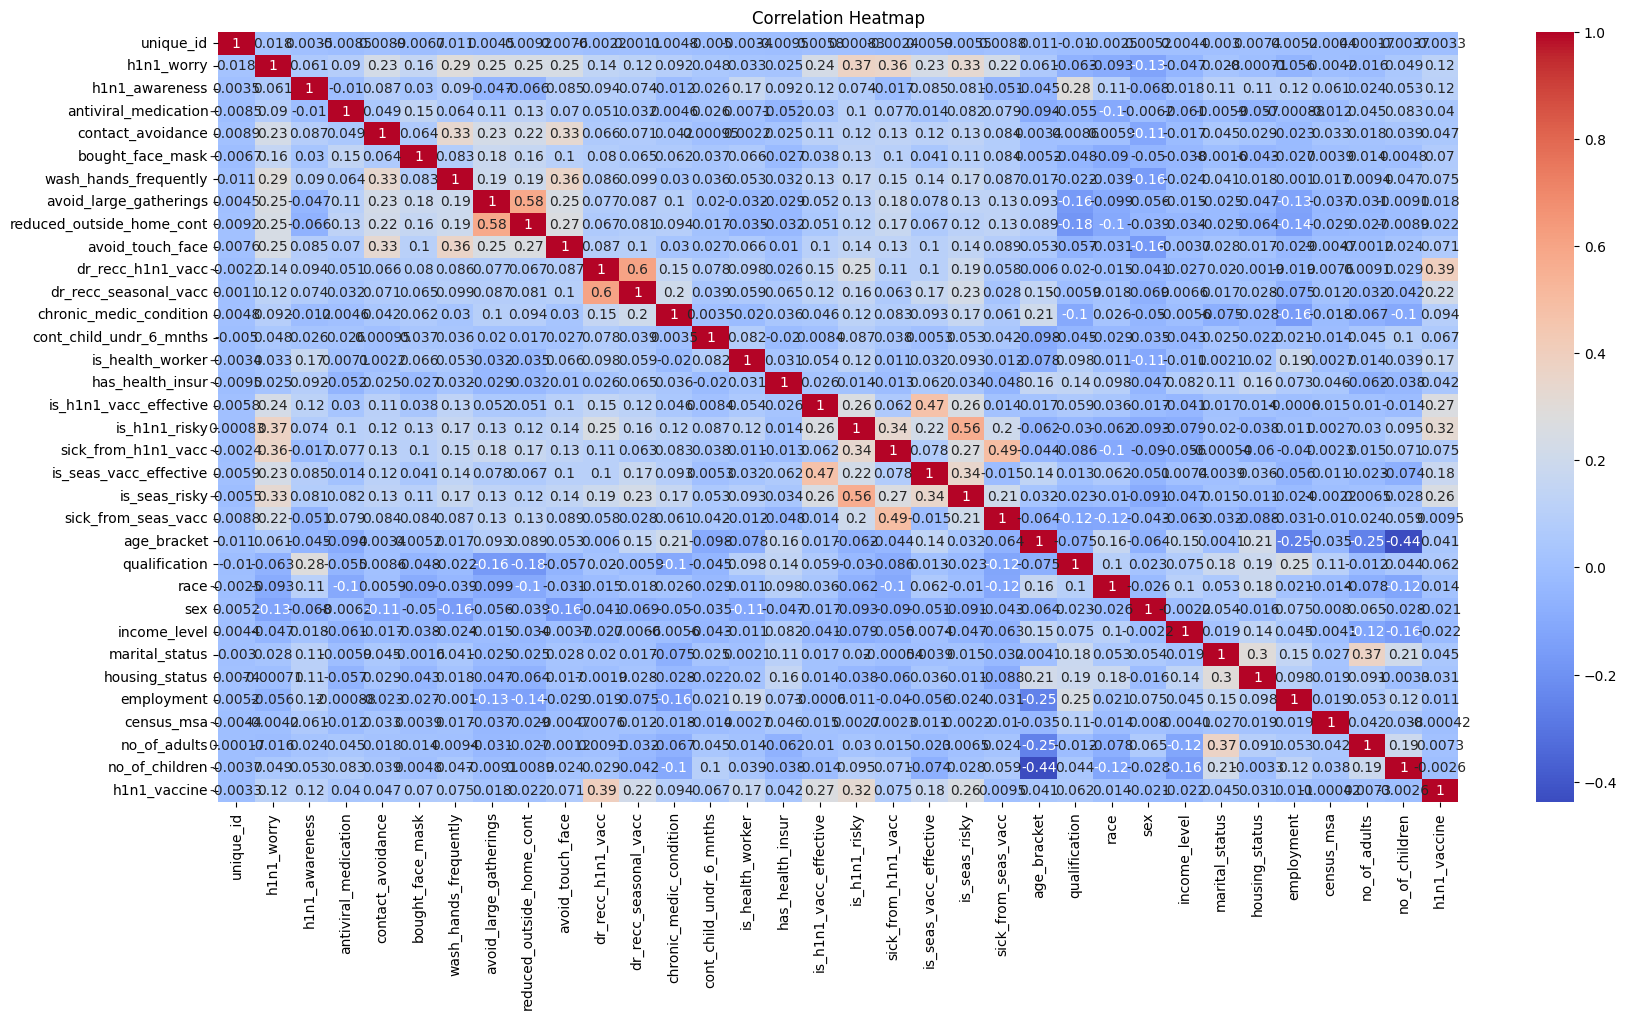

In [126]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(), annot=True ,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

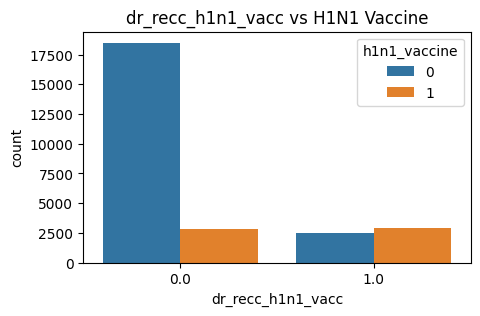

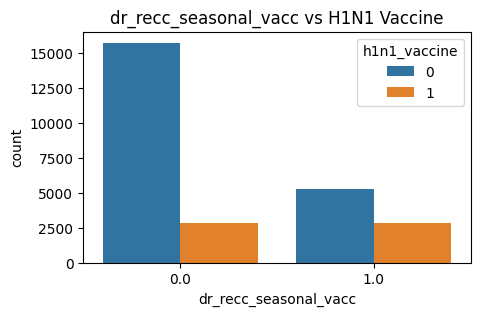

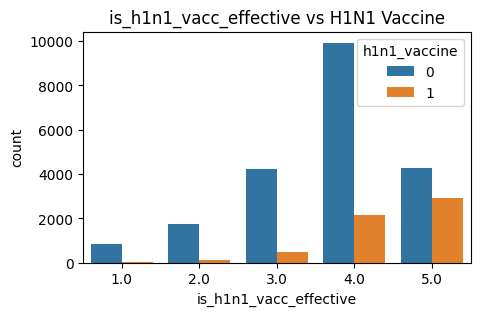

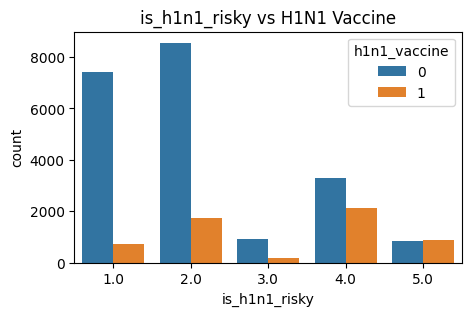

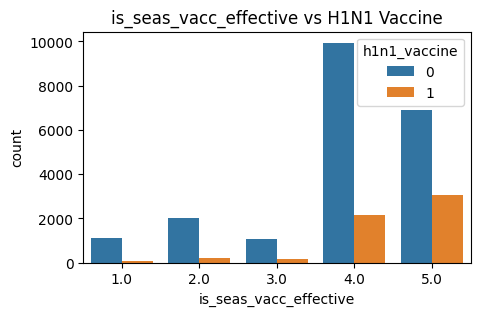

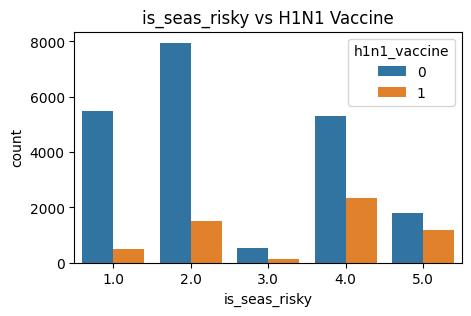

In [127]:
grouped_features = ['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'is_h1n1_vacc_effective',
                    'is_h1n1_risky', 'is_seas_vacc_effective', 'is_seas_risky']

for feature in grouped_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=feature, hue='h1n1_vaccine', data=df)
    plt.title(f'{feature} vs H1N1 Vaccine')
    plt.show()

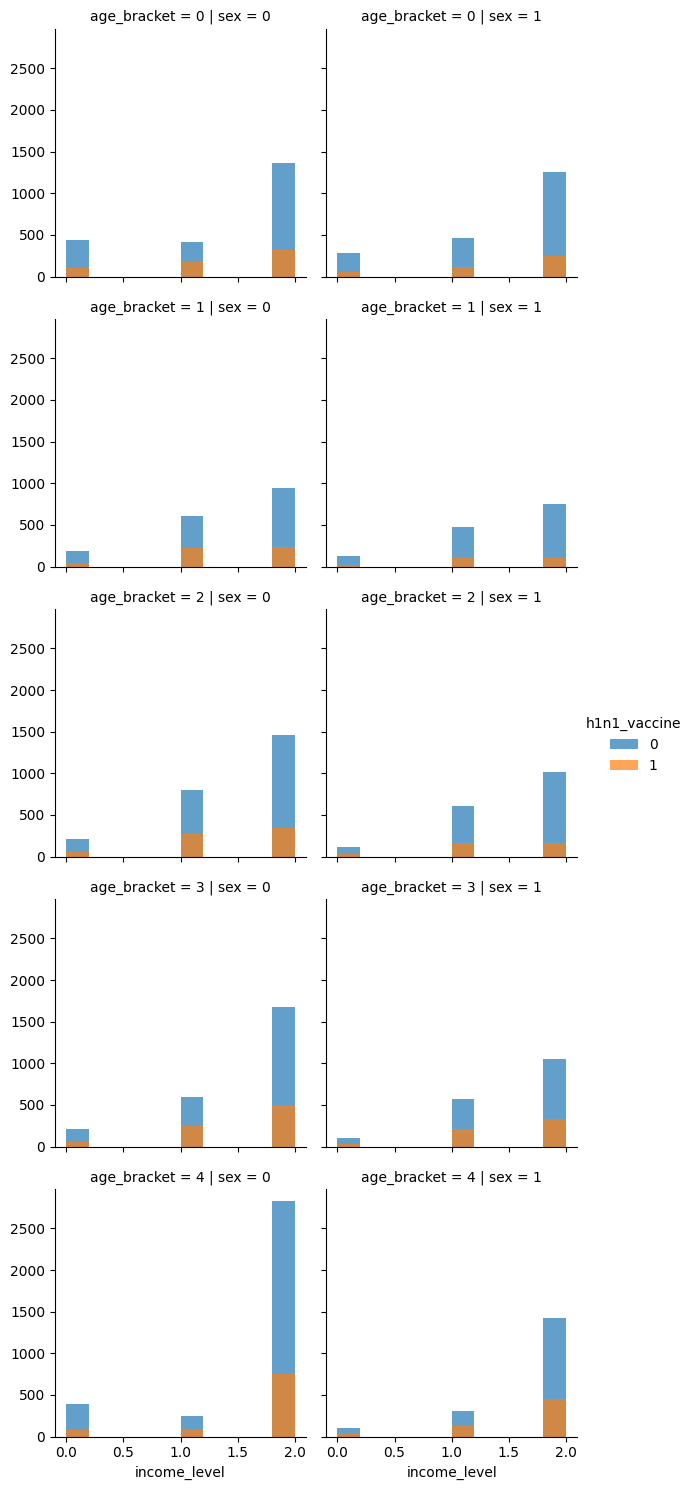

In [128]:
g = sns.FacetGrid(df1, col="sex", row="age_bracket", hue="h1n1_vaccine")
g.map(plt.hist, "income_level", alpha=.7)
g.add_legend()
plt.show()


<Axes: xlabel='h1n1_worry', ylabel='h1n1_vaccine'>

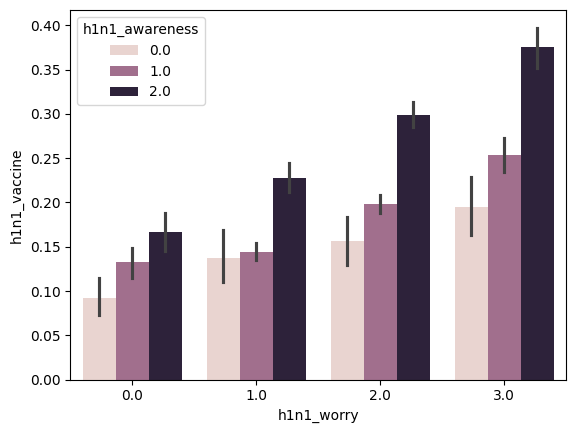

In [129]:
sns.barplot(x="h1n1_worry",y="h1n1_vaccine",hue="h1n1_awareness",data=df)

In [130]:
'''for feature in num_columns:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(df[feature][df['h1n1_vaccine'] == 0], label='Not Vaccinated', shade=True)
    sns.kdeplot(df[feature][df['h1n1_vaccine'] == 1], label='Vaccinated', shade=True)
    plt.title(f'Density Plot of {feature} by H1N1 Vaccine')
    plt.show()'''


"for feature in num_columns:\n    plt.figure(figsize=(5, 3))\n    sns.kdeplot(df[feature][df['h1n1_vaccine'] == 0], label='Not Vaccinated', shade=True)\n    sns.kdeplot(df[feature][df['h1n1_vaccine'] == 1], label='Vaccinated', shade=True)\n    plt.title(f'Density Plot of {feature} by H1N1 Vaccine')\n    plt.show()"

In [131]:
X=df1.drop(["unique_id","h1n1_vaccine"],axis=1)
y=df1.h1n1_vaccine

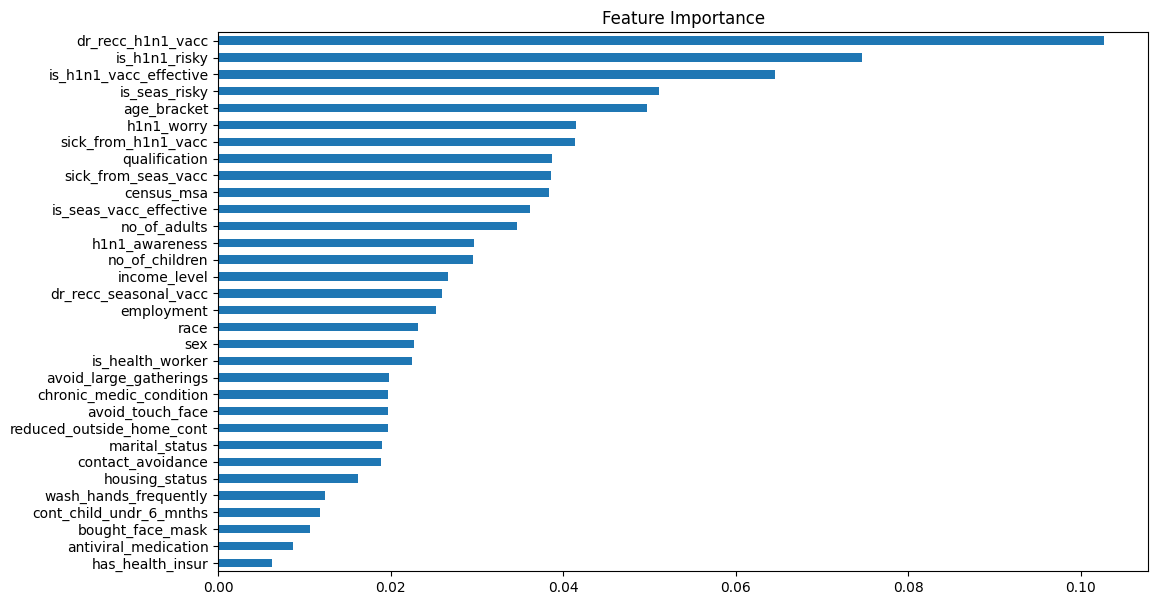

In [132]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X is your feature matrix and y is your target variable
model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(12, 7))
plt.title('Feature Importance')
plt.show()

In [133]:
importances.sort_values(ascending=False)[:15]

dr_recc_h1n1_vacc         0.102670
is_h1n1_risky             0.074597
is_h1n1_vacc_effective    0.064532
is_seas_risky             0.051141
age_bracket               0.049677
h1n1_worry                0.041455
sick_from_h1n1_vacc       0.041361
qualification             0.038728
sick_from_seas_vacc       0.038541
census_msa                0.038353
is_seas_vacc_effective    0.036149
no_of_adults              0.034669
h1n1_awareness            0.029646
no_of_children            0.029504
income_level              0.026632
dtype: float64

In [134]:
final_df=df1.copy()

In [135]:
final_df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                  int64
race                           int64
sex                            int64
income_level                   int64
m

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
X.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'],
      dtype='object')

In [138]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [139]:
final_df.h1n1_vaccine.value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

<Axes: ylabel='count'>

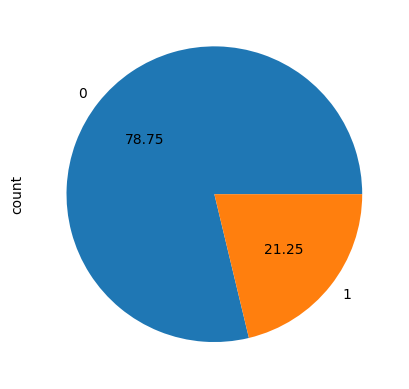

In [140]:
final_df['h1n1_vaccine'].value_counts().plot.pie(autopct='%.2f')

In [141]:
X=final_df[["dr_recc_h1n1_vacc",
"is_h1n1_risky",
"is_h1n1_vacc_effective",
"age_bracket",
"is_seas_risky",
"sick_from_h1n1_vacc",
"h1n1_worry",
"sick_from_seas_vacc",
"qualification",
"census_msa",
"is_seas_vacc_effective",
"no_of_adults",
"no_of_children",
"h1n1_awareness",
"income_level"]]
y=final_df.h1n1_vaccine

In [142]:
X

,dr_recc_h1n1_vacc,is_h1n1_risky,is_h1n1_vacc_effective,age_bracket,is_seas_risky,sick_from_h1n1_vacc,h1n1_worry,sick_from_seas_vacc,qualification,census_msa,is_seas_vacc_effective,no_of_adults,no_of_children,h1n1_awareness,income_level
0,0.0,1.0,3.0,3,1.0,2.0,1.0,2.0,0,0,2.0,0.0,0.0,0.0,0
1,0.0,4.0,5.0,1,2.0,4.0,3.0,4.0,1,2,4.0,0.0,0.0,2.0,0
2,0.0,1.0,3.0,0,1.0,1.0,1.0,2.0,3,2,4.0,2.0,0.0,1.0,2
3,0.0,3.0,3.0,4,4.0,5.0,1.0,1.0,1,1,5.0,0.0,0.0,1.0,0
4,0.0,3.0,3.0,2,1.0,2.0,2.0,4.0,2,2,3.0,1.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,3.0,4,2.0,1.0,2.0,2.0,2,0,5.0,0.0,0.0,0.0,2
26703,1.0,2.0,4.0,0,1.0,2.0,1.0,1.0,3,1,5.0,1.0,0.0,2.0,2
26704,0.0,4.0,4.0,3,4.0,2.0,2.0,2.0,2,2,5.0,0.0,0.0,2.0,2
26705,0.0,1.0,3.0,0,1.0,2.0,1.0,2.0,2,0,2.0,1.0,0.0,1.0,2


In [143]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=123)

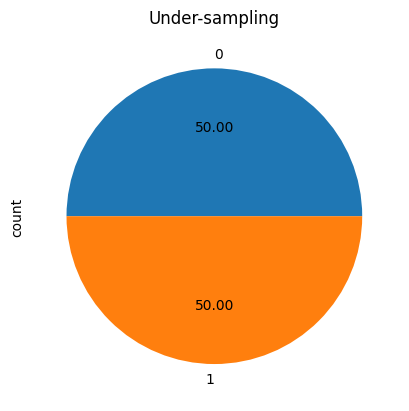

In [145]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_train, y_train)
ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [146]:
X_train_rus

,dr_recc_h1n1_vacc,is_h1n1_risky,is_h1n1_vacc_effective,age_bracket,is_seas_risky,sick_from_h1n1_vacc,h1n1_worry,sick_from_seas_vacc,qualification,census_msa,is_seas_vacc_effective,no_of_adults,no_of_children,h1n1_awareness,income_level
9555,0.0,3.0,3.0,4,3.0,2.0,0.0,2.0,3,1,3.0,1.0,0.0,1.0,2
19500,0.0,2.0,4.0,4,5.0,2.0,1.0,4.0,2,2,5.0,1.0,0.0,2.0,2
9878,0.0,5.0,4.0,1,5.0,5.0,2.0,5.0,0,2,4.0,2.0,0.0,1.0,0
25529,1.0,5.0,4.0,1,5.0,4.0,3.0,4.0,3,2,5.0,3.0,3.0,1.0,2
25114,0.0,1.0,4.0,1,1.0,1.0,1.0,1.0,3,1,2.0,1.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,0.0,2.0,4.0,4,2.0,1.0,2.0,1.0,1,0,4.0,0.0,0.0,1.0,2
6648,0.0,1.0,3.0,2,1.0,1.0,0.0,2.0,3,1,4.0,1.0,1.0,2.0,1
3481,1.0,3.0,3.0,3,2.0,1.0,2.0,1.0,3,2,4.0,0.0,0.0,2.0,1
20527,1.0,4.0,4.0,2,4.0,2.0,3.0,4.0,2,1,4.0,1.0,0.0,2.0,2


In [147]:
y_train_rus

9555     0
19500    0
9878     0
25529    0
25114    0
        ..
3252     1
6648     1
3481     1
20527    1
19966    1
Name: h1n1_vaccine, Length: 5606, dtype: int64

In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train_rus, y_train_rus)

LogisticRegression(max_iter=10000)

In [149]:
y_predict= model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print (classification_report(y_test, y_predict))
print (confusion_matrix(y_test, y_predict))
print (accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     10483
           1       0.47      0.72      0.57      2871

    accuracy                           0.77     13354
   macro avg       0.69      0.75      0.70     13354
weighted avg       0.82      0.77      0.78     13354

[[8142 2341]
 [ 793 2078]]
0.7653137636663172


In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [152]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [153]:
grid_search.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [154]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.7558002229356587


In [155]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(random_state=76,criterion="entropy")

In [156]:
tree_model.fit(X_train_rus,y_train_rus)
pred=tree_model.predict(X_test_rus)

In [157]:
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [158]:
print("accuracy : ",accuracy_score(y_test_rus,pred))
print("confusion matrics : \n",confusion_matrix(y_test_rus,pred))
print("classification report : \n",classification_report(y_test_rus,pred))

accuracy :  0.8719229397074563
confusion matrics : 
 [[2099  704]
 [  14 2789]]
classification report : 
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      2803
           1       0.80      1.00      0.89      2803

    accuracy                           0.87      5606
   macro avg       0.90      0.87      0.87      5606
weighted avg       0.90      0.87      0.87      5606



In [160]:
X.columns

Index(['dr_recc_h1n1_vacc', 'is_h1n1_risky', 'is_h1n1_vacc_effective',
       'age_bracket', 'is_seas_risky', 'sick_from_h1n1_vacc', 'h1n1_worry',
       'sick_from_seas_vacc', 'qualification', 'census_msa',
       'is_seas_vacc_effective', 'no_of_adults', 'no_of_children',
       'h1n1_awareness', 'income_level'],
      dtype='object')

In [161]:
len(['dr_recc_h1n1_vacc', 'is_h1n1_risky', 'is_h1n1_vacc_effective',
       'age_bracket', 'is_seas_risky', 'sick_from_h1n1_vacc', 'h1n1_worry',
       'sick_from_seas_vacc', 'qualification', 'census_msa',
       'is_seas_vacc_effective', 'no_of_adults', 'no_of_children',
       'h1n1_awareness', 'income_level'])

15

In [165]:
X.loc[0]

dr_recc_h1n1_vacc         0.0
is_h1n1_risky             1.0
is_h1n1_vacc_effective    3.0
age_bracket               3.0
is_seas_risky             1.0
sick_from_h1n1_vacc       2.0
h1n1_worry                1.0
sick_from_seas_vacc       2.0
qualification             0.0
census_msa                0.0
is_seas_vacc_effective    2.0
no_of_adults              0.0
no_of_children            0.0
h1n1_awareness            0.0
income_level              0.0
Name: 0, dtype: float64

In [169]:
y.loc[0]

0

In [167]:
dr_recc_h1n1_vacc=float(input("dr_recc_h1n1_vacc :"))
is_h1n1_risky=float(input("is_h1n1_risky :"))
is_h1n1_vacc_effective=float(input("is_h1n1_vacc_effective"))
age_bracket=float(input("age_bracket"))
is_seas_risky=float(input("is_seas_risky"))
sick_from_h1n1_vacc=float(input("sick_from_h1n1_vacc"))
h1n1_worry=float(input("h1n1_worry"))
sick_from_seas_vacc=float(input("sick_from_seas_vacc"))
qualification=float(input("qualification"))
census_msa=float(input("census_msa"))
is_seas_vacc_effective=float(input("is_seas_vacc_effective"))
no_of_adults=float(input("no_of_adults"))
no_of_children=float(input("no_of_children"))
h1n1_awareness=float(input("h1n1_awareness"))
income_level=float(input("income_level"))

features=[[dr_recc_h1n1_vacc, is_h1n1_risky, is_h1n1_vacc_effective,
       age_bracket, is_seas_risky, sick_from_h1n1_vacc, h1n1_worry,
       sick_from_seas_vacc, qualification, census_msa,
       is_seas_vacc_effective, no_of_adults, no_of_children,
       h1n1_awareness, income_level]]

output=model.predict(features)

In [168]:
output

array([0], dtype=int64)

In [175]:
import pickle
with open("model.pkl","wb")as f:
    pickle.dump(model,f)

In [176]:
with open("model.pkl","rb")as f:
    model=pickle.load(f)